# Dataset curation - Feature scaling for time series data

[![Open In Colab <](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ShawnHymel/ai-nose/blob/master/ai-nose-dataset-curation.ipynb)

In the paper "Efficient BackProp" [1], LeCun et al. shows that we can achieve a more accurate model (e.g. artificial neural network) in less time by standarizing (i.e. to a mean of 0 and unit variance) and decorrelating our input data.

However, the process of standarization assumes that the data is normally distributed (i.e. Gaussian). If our data does not follow a Gaussian distribution, we should perform normalization [2], where we divide by the range to produce a set of values between 0 and 1.

Create a directory */content/dataset* and upload your entire dataset there. Run through the cells in this notebook, following all of the directions to analyze the data and create a curated dataset. If you perform normalization or standarization for any dimension, you will need to copy the mean, standard deviation, minimum, and range arrays for use in your inference code (i.e. preprocessing the data before running inference).

[1] http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf

[2] https://becominghuman.ai/what-does-feature-scaling-mean-when-to-normalize-data-and-when-to-standardize-data-c3de654405ed 

## Step 1: Analyze the data

In [7]:
import csv
import os
import shutil

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
### Settings
HOME_PATH = ""              # Location of the working directory
DATASET_PATH = HOME_PATH + "EXP0/"   # Upload your .csv samples to this directory
OUT_PATH = HOME_PATH + "/out"           # Where output files go (will be deleted and recreated)
OUT_ZIP = HOME_PATH+ "/out.zip"        # Where to store the zipped output files

# Do not change these settings!
PREP_DROP = -1                      # Drop a column
PREP_NONE = 0                       # Perform no preprocessing on column of data
PREP_STD = 1                        # Perform standardization on column of data
PREP_NORM = 2                       # Perform normalization on column of data

In [10]:
### Read in .csv files to construct one long multi-axis, time series data

# Store header, raw data, and number of lines found in each .csv file
header = None
raw_data = []
num_lines = []
filenames = []

# Read each CSV file
for filename in os.listdir(DATASET_PATH):
    
  # Check if the path is a file
  filepath = os.path.join(DATASET_PATH, filename)
  filepath = filepath.replace('\\', '/')
  if not os.path.isfile(filepath):
    continue
  
  # Read the .csv file
  with open(filepath) as f:
    csv_reader = csv.reader(f, delimiter=',')

    # Read each line
    valid_line_counter = 0
    for line_count, line in enumerate(csv_reader):

      # Check header
      if line_count == 0:

        # Record first header as our official header for all the data
        if header == None:
          header = line

        # Check to make sure subsequent headers match the original header
        if header == line:
          num_lines.append(0)
          filenames.append(filename)
        else:
          print("Error: Headers do not match. Skipping", filename)
          break

      # Construct raw data array, make sure number of elements match number of header labels
      else:
        if len(line) == len(header):
          raw_data.append(line)
          num_lines[-1] += 1
        else:
          print("Error: Data length does not match header length. Skipping line.")
          continue

# Convert our raw data into a numpy array
raw_data = np.array(raw_data).astype(float)

# Print out our results
print("Dataset array shape:", raw_data.shape)
print("Number of elements in num_lines:", len(num_lines))
print("Number of filenames:", len(filenames))
assert(len(num_lines) == len(filenames))

Dataset array shape: (89877, 10)
Number of elements in num_lines: 30
Number of filenames: 30


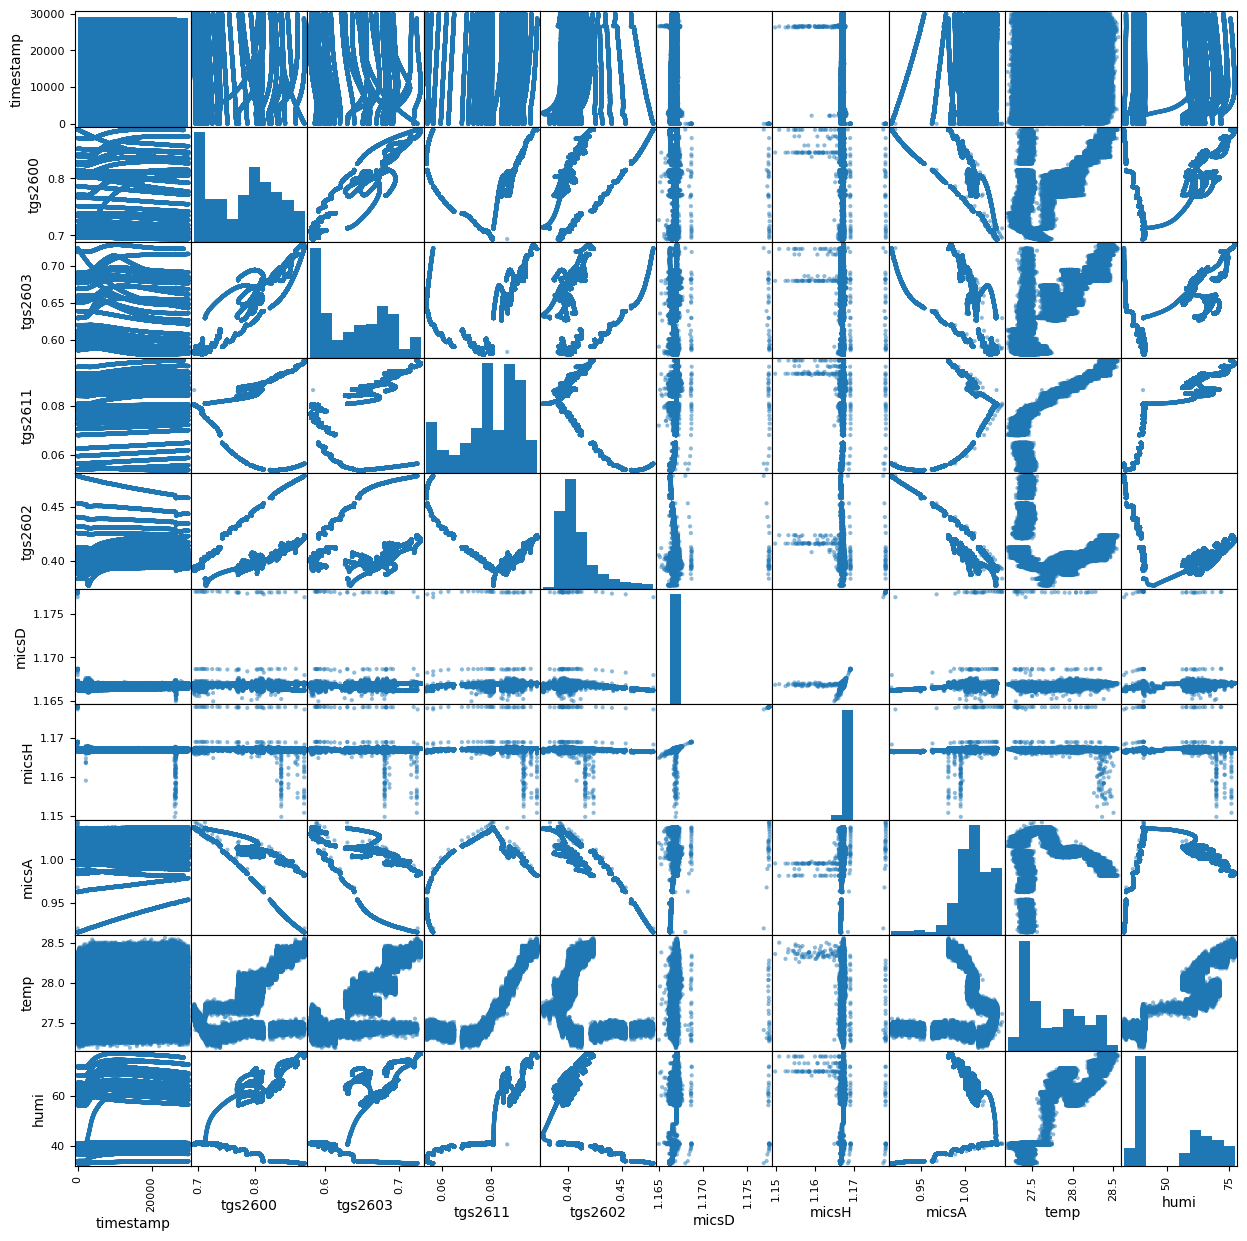

In [11]:
### Plot scatter matrix to look for correlation

# Convert NumPy array to Pandas DataFrame
df = pd.DataFrame(raw_data, columns=header)

# Create scatter matrix
sm = pd.plotting.scatter_matrix(df, figsize=(15, 15))

Notice the wide range of input values! We need to get those to be close to the same range so that the correlation plots will make more sense. Before we do that, we should plot the histograms to see how the data is distributed.

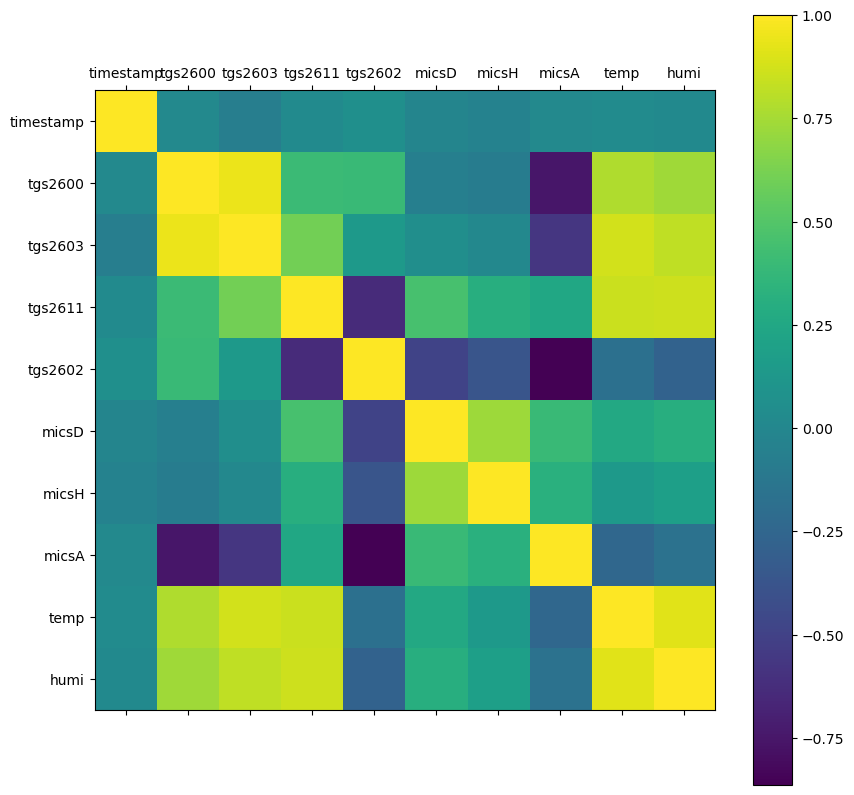

In [12]:
### Show correlation matrix as colors

# Create plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
im = ax.matshow(df.corr())

# Add legend
fig.colorbar(im)

# Add x and y labels
_ = ax.set_xticks(np.arange(len(header)))
_ = ax.set_xticklabels(header)
_ = ax.set_yticks(np.arange(len(header)))
_ = ax.set_yticklabels(header)

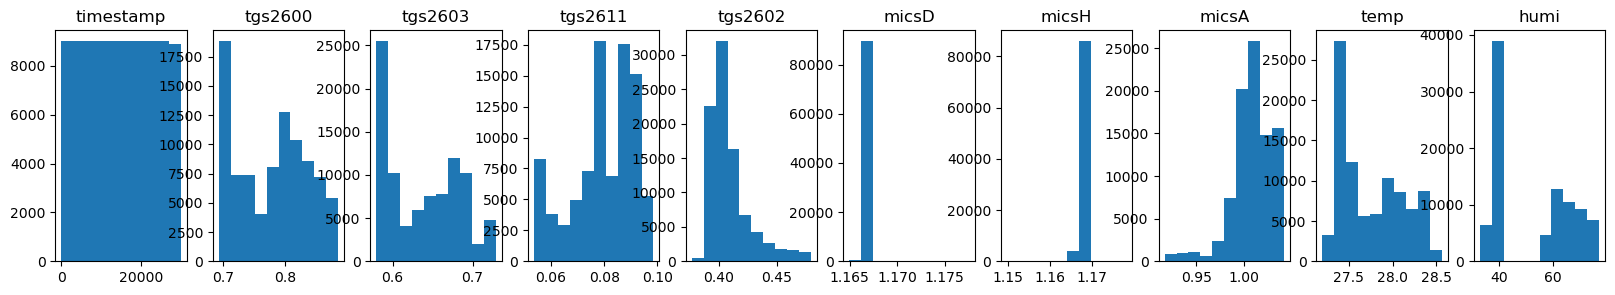

In [13]:
### Examine the histograms of all the data

# Create subplots
num_hists = len(header)
fig, axs = plt.subplots(1, num_hists, figsize=(20,3))

# Create histogram for each category of data
for i in range(num_hists):
  _ = axs[i].hist(raw_data[:, i])
  axs[i].title.set_text(header[i])

In [14]:
### Analyze the data

# Calculate means, standard deviations, and ranges
means = np.mean(raw_data, axis=0)
std_devs = np.std(raw_data, axis=0)
maxes = np.max(raw_data, axis=0)
mins = np.min(raw_data, axis=0)
ranges = np.ptp(raw_data, axis=0)

# Print results
for i, name in enumerate(header):
  print(name)
  print("  mean:", means[i])
  print("  std dev:", std_devs[i])
  print("  max:", maxes[i])
  print("  min:", mins[i])
  print("  range:", ranges[i])

timestamp
  mean: 14975.313595246836
  std dev: 8649.790917502045
  max: 29990.0
  min: 0.0
  range: 29990.0
tgs2600
  mean: 0.779133912705983
  std dev: 0.056963606386849566
  max: 0.8860389232635498
  min: 0.6931710720062255
  range: 0.1928678512573243
tgs2603
  mean: 0.6380405522573883
  std dev: 0.04460497519808952
  max: 0.7290055274963378
  min: 0.5799400806427002
  range: 0.14906544685363765
tgs2611
  mean: 0.07986907503777467
  std dev: 0.012010198872049868
  max: 0.0985064506530761
  min: 0.0536756515502929
  range: 0.0448307991027832
tgs2602
  mean: 0.4091747780461186
  std dev: 0.01756386381533609
  max: 0.479459810256958
  min: 0.3764044761657715
  range: 0.1030553340911865
micsD
  mean: 1.166912427966076
  std dev: 0.0002541631889716772
  max: 1.177527093887329
  min: 1.1649796485900878
  range: 0.012547445297241167
micsH
  mean: 1.167184144689234
  std dev: 0.0003568396868974993
  max: 1.1780696868896483
  min: 1.1497879028320312
  range: 0.028281784057617054
micsA
  mean

## Step 2: Choose how to preprocess the data

In [16]:
### Choose preprocessing method for each column
#     PREP_DROP: Drop column
#     PREP_NONE: no preprocessing
#     PREP_STD: standardization (if data is Gaussian)
#     PREP_NORM: normalization (if data is non-Gaussian)

# Change this to match your picks!
preproc = [PREP_NONE,   # Timestamp
           PREP_NORM,   # ch0
           PREP_NORM,   # ch1
           PREP_NORM,   # ch2
           PREP_NORM,   # ch3
           PREP_NORM,   # ch4
           PREP_NORM,   # ch5
           PREP_NORM,   # ch6
           PREP_NORM,   # temp
           PREP_NORM]   # humi


# Check to make sure we have the correct number of preprocessing request elements
assert(len(preproc) == len(header))
assert(len(preproc) == raw_data.shape[1])

# ### If we do not need the timestamp column, drop it from the data
# if not KEEP_TIMESTAMP:
#   header = header[1:]
#   raw_data = raw_data[:,1:]
#   print("Array shape without timestamp:", data_without_time.shape)

## Step 3: Perform data preprocessing

In [17]:
### Perform preprocessing steps as requested

# Figure out how many columns we plan to keep
num_cols = sum(1 for x in preproc if x != PREP_DROP)

# Create empty numpy array and header for preprocessed data
prep_data = np.zeros((raw_data.shape[0], num_cols))
prep_header = []
prep_means = []
prep_std_devs = []
prep_mins = []
prep_ranges = []

# Go through each column to preprocess the data
prep_c = 0
for raw_c in range(len(header)):

  # Drop column if requested
  if preproc[raw_c] == PREP_DROP:
    print("Dropping", header[raw_c])
    continue

  # Perform data standardization
  if preproc[raw_c] == PREP_STD:
    prep_data[:, prep_c] = (raw_data[:, raw_c] - means[raw_c]) / std_devs[raw_c]

  # Perform data normalization
  elif preproc[raw_c] == PREP_NORM:
    prep_data[:, prep_c] = (raw_data[:, raw_c] - mins[raw_c]) / ranges[raw_c]

  # Copy data over if no preprocessing is requested
  elif preproc[raw_c] == PREP_NONE:
    prep_data[:, raw_c] = raw_data[:, raw_c]

  # Error if code not recognized
  else:
    raise Exception("Preprocessing code not recognized")

  # Copy header (and preprocessing constants) and increment preprocessing column index
  prep_header.append(header[raw_c])
  prep_means.append(means[raw_c])
  prep_std_devs.append(std_devs[raw_c])
  prep_mins.append(mins[raw_c])
  prep_ranges.append(ranges[raw_c])
  prep_c += 1

# Show new data header and shape
print(prep_header)
print("New data shape:", prep_data.shape)
print("Means:", [float("{:.4f}".format(x)) for x in prep_means])
print("Std devs:", [float("{:.4f}".format(x)) for x in prep_std_devs])
print("Mins:", [float("{:.4f}".format(x)) for x in prep_mins])
print("Ranges:", [float("{:.4f}".format(x)) for x in prep_ranges])

['timestamp', 'tgs2600', 'tgs2603', 'tgs2611', 'tgs2602', 'micsD', 'micsH', 'micsA', 'temp', 'humi']
New data shape: (89877, 10)
Means: [14975.3136, 0.7791, 0.638, 0.0799, 0.4092, 1.1669, 1.1672, 1.0085, 27.7524, 52.7887]
Std devs: [8649.7909, 0.057, 0.0446, 0.012, 0.0176, 0.0003, 0.0004, 0.0211, 0.3578, 13.8222]
Mins: [0.0, 0.6932, 0.5799, 0.0537, 0.3764, 1.165, 1.1498, 0.9164, 27.1934, 32.929]
Ranges: [29990.0, 0.1929, 0.1491, 0.0448, 0.1031, 0.0125, 0.0283, 0.1262, 1.3696, 44.2145]


## Step 4: Analyze newly preprocessed data

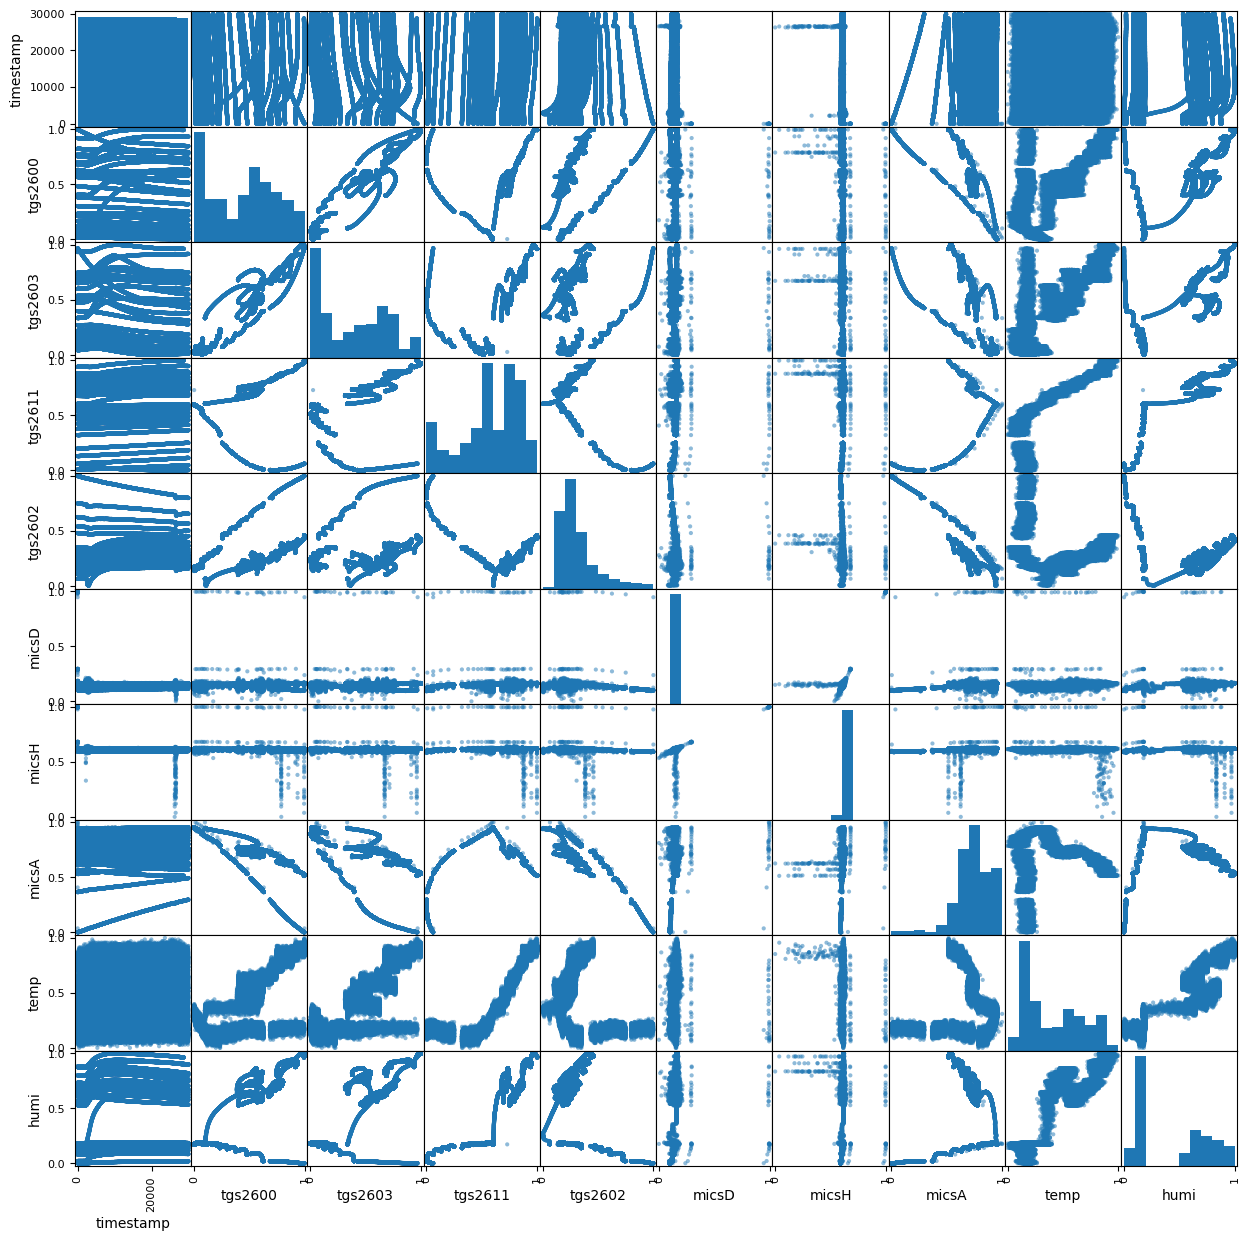

In [18]:
### Recreate the scatter matrix to look for correlation

# Convert NumPy array to Pandas DataFrame
df = pd.DataFrame(prep_data, columns=prep_header)

# Create scatter matrix
sm = pd.plotting.scatter_matrix(df, figsize=(15, 15))

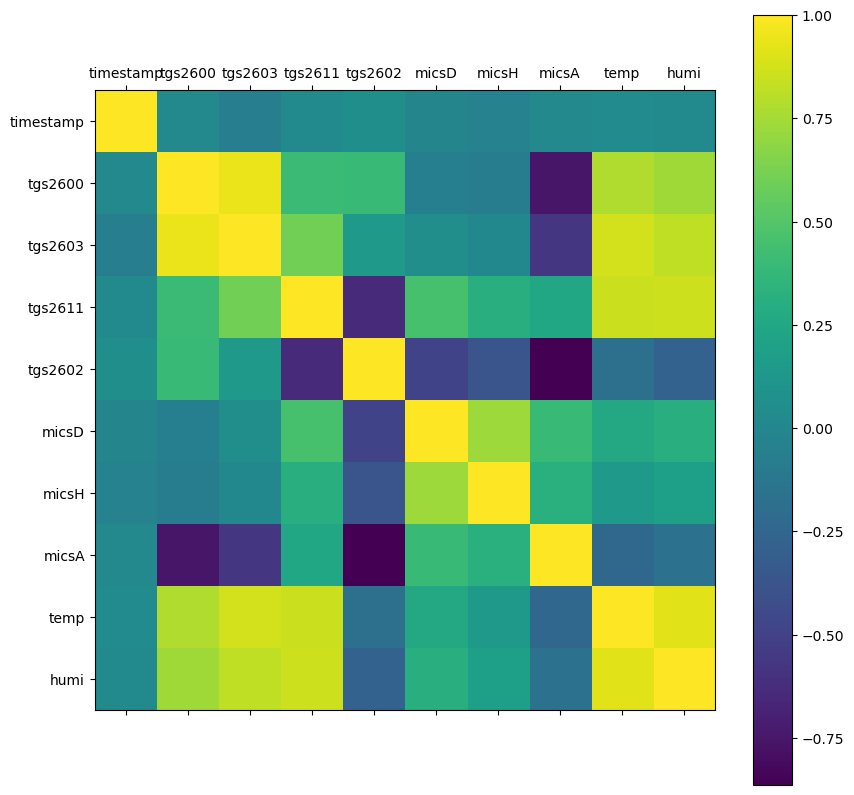

In [19]:
### Show correlation matrix as colors

# Create plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
im = ax.matshow(df.corr())

# Add legend
fig.colorbar(im)

# Add x and y labels
_ = ax.set_xticks(np.arange(len(prep_header)))
_ = ax.set_xticklabels(prep_header)
_ = ax.set_yticks(np.arange(len(prep_header)))
_ = ax.set_yticklabels(prep_header)

## Step 5: Store preprocessed data in CSV files

In [20]:
### Delete output directory (if it exists) and recreate it
if os.path.exists(OUT_PATH):
  shutil.rmtree(OUT_PATH)
os.makedirs(OUT_PATH)

In [21]:
### Write out data to .csv files

# Go through all the original filenames
row_index = 0
for file_num, filename in enumerate(filenames):

  # Open .csv file
  file_path = os.path.join(OUT_PATH, filename)
  with open(file_path, 'w') as f:
    csv_writer = csv.writer(f, delimiter=',')

    # Write header
    csv_writer.writerow(prep_header)

    # Write contents
    for _ in range(num_lines[file_num]):
      csv_writer.writerow(prep_data[row_index])
      row_index += 1

In [22]:
### Delete empty lines

def delete_empty_lines(file_path):
    # Read the file
    with open(file_path, 'r') as file:
        content = file.read()

    # Remove the last newline character if present
    if content.endswith('\n'):
        content = content[:-1]

    # Overwrite the file with the modified content
    with open(file_path, 'w') as file:
        file.write(content)

        
for file_num, filename in enumerate(filenames):
  # Open .csv file
  file_path = os.path.join(OUT_PATH, filename)
  file_path = file_path.replace("\\", "/")
  print(f"{file_path}")
  delete_empty_lines(file_path)


/out/com_sopro._15.csv
/out/com_sopro._16.csv
/out/com_sopro._17.csv
/out/com_sopro._18.csv
/out/com_sopro._19.csv
/out/com_sopro._20.csv
/out/com_sopro._21.csv
/out/com_sopro._22.csv
/out/com_sopro._23.csv
/out/com_sopro._24.csv
/out/com_sopro._25.csv
/out/com_sopro._26.csv
/out/com_sopro._27.csv
/out/com_sopro._28.csv
/out/com_sopro._29.csv
/out/sem_sopro._0.csv
/out/sem_sopro._1.csv
/out/sem_sopro._10.csv
/out/sem_sopro._11.csv
/out/sem_sopro._12.csv
/out/sem_sopro._13.csv
/out/sem_sopro._14.csv
/out/sem_sopro._2.csv
/out/sem_sopro._3.csv
/out/sem_sopro._4.csv
/out/sem_sopro._5.csv
/out/sem_sopro._6.csv
/out/sem_sopro._7.csv
/out/sem_sopro._8.csv
/out/sem_sopro._9.csv


In [23]:
def replace_header_name(filename, old_header, new_header):
    # Read the CSV file
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        rows = list(reader)

    # Replace the header name
    if rows and old_header in rows[0]:
        rows[0][rows[0].index(old_header)] = new_header

    # Write the modified content back to the CSV file
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(rows)
        
        
for file_num, filename in enumerate(filenames):
  # Open .csv file
  file_path = os.path.join(OUT_PATH, filename)
  file_path = file_path.replace("\\", "/")
  print(f"{file_path}")
  replace_header_name(file_path, 'time', 'timestamp')

/out/com_sopro._15.csv
/out/com_sopro._16.csv
/out/com_sopro._17.csv
/out/com_sopro._18.csv
/out/com_sopro._19.csv
/out/com_sopro._20.csv
/out/com_sopro._21.csv
/out/com_sopro._22.csv
/out/com_sopro._23.csv
/out/com_sopro._24.csv
/out/com_sopro._25.csv
/out/com_sopro._26.csv
/out/com_sopro._27.csv
/out/com_sopro._28.csv
/out/com_sopro._29.csv
/out/sem_sopro._0.csv
/out/sem_sopro._1.csv
/out/sem_sopro._10.csv
/out/sem_sopro._11.csv
/out/sem_sopro._12.csv
/out/sem_sopro._13.csv
/out/sem_sopro._14.csv
/out/sem_sopro._2.csv
/out/sem_sopro._3.csv
/out/sem_sopro._4.csv
/out/sem_sopro._5.csv
/out/sem_sopro._6.csv
/out/sem_sopro._7.csv
/out/sem_sopro._8.csv
/out/sem_sopro._9.csv


In [24]:
### Zip output directory
%cd {OUT_PATH}
!zip -FS -r -q {OUT_ZIP} *
%cd {HOME_PATH}

C:\out
C:\Users\liwka


'zip' não é reconhecido como um comando interno
ou externo, um programa operável ou um arquivo em lotes.
